# Welcome to 画像生成 AI tutorial ‼

**対象レベル**  
このチュートリアルはPythonチュートリアルの [4. その他の制御フローツール](https://docs.python.org/ja/3/tutorial/controlflow.html)の関数定義までの知識があることを前提としています。

このtutorialではGAN(敵対的生成ネットワーク)を用いた画像生成についてやっていきます。コードブロックを一つ一つ実行していくと画像を生成してくれるAIモデルが出来上がります。  
ここに出てくるプログラムコードを自分の手で書き写して実行してみると良いと思います。 
ベースとなっているより詳しいチュートリアルはこちらです。  
日本語: [【PyTorchチュートリアル⑪】DCGAN Tutorial](https://qiita.com/sudominoru/items/02f4b6313585f14b210c)  
英語:[DCGAN TUTORIAL](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)  
それでは始めていきましょう！

### 目次

### 注意事項
このチュートリアルは演算負荷が高いためGPU環境が必要です。  
Google Colab で実行している方は、ページ上部から**ランタイム** &rarr; **ランタイムのタイプを変更** をクリックし **ハードウェアアクセラレータ** を *None* から *GPU* に変更してください。  
GPUが使用可能かどうかは次のコードブロックを実行することで分かります。

In [5]:
import torch
print("GPU:",torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using:",device)

GPU: True
Using: cuda:0


# ・下準備
さて、AIを作るための下準備をしていきましょう。勝手に画像を生成するAIが作れたらうれしいのですが、残念ながらそう簡単にはいきません。  
AIを作るための先人の知恵と努力の塊である「ライブラリ」を使いますし、学習するためには大きなデータセットが必要です。  
それではサクッと下準備をしてしまいましょう。

### ライブラリ
```import Namae```や```from Namae1 import Namae2```ですでにインストールされているライブラリを使います。これからもちょくちょく出てきます。  
ちなみにPythonのライブラリの主なインストール方法は```pip install Namae```です。詳しくは[公式ドキュメント](https://docs.python.org/ja/3/installing/index.html)を参照ください。  

In [15]:
import torch # Deep Learningのためのライブラリです。
import torchvision # 画像処理のためのライブラリです。
import torchvision.transforms as transforms # 画像処理のライブラリから「変換」に特化したものを持ってきます
import numpy as np # 行列計算のためのライブラリです。

### データセット
画像を生成することにもデータセットが必要です。画像生成といってもまったく新しい画像を一から生成するわけではなく、**あくまでデータセットに似ている新しい画像**を生成します。データセットがバリエーション豊かで膨大であればそれだけたくさんの種類の画像を生成することができます。  
今回は犬の猫の画像のデータセットを使っていきましょう。(https://www.kaggle.com/zippyz/cats-and-dogs-breeds-classification-oxford-dataset)


データセットをダウンロードします。

データセットを前処理します。  
多くの場合、AIモデルの入力は決まった形のデータである必要があります。ただの画像データを```torch.Tensor```という型にしたり、今回の場合は64x64にリサイズしたりします。

In [14]:
from torchvision.datasets import ImageFolder # 画像があるフォルダをデータセットとして読み込むために使います。

dataroot = "data/images" # 仕様上、サブフォルダーから読み込むので画像があるフォルダの一つ上を指定します。
image_size = 64 # すべての画像はResizeとCentorCropを使用してこのサイズに変更されます。
data_trans = transforms.Compose([       # Composeは処理をまとめるという意味です。
    transforms.Resize(image_size),      # Resizeするときの辺の長さです。
    transforms.CenterCrop(image_size),  # 画像の縦横の長さが異なる場合は中央を切り取ります。
    transforms.ToTensor(),              # 画像データをtorch.Tensor型にします。ついでに各ピクセルの値が
                                        # 0~1に正規化されます。
    transforms.Normalize(mean=0.5, std=0.5),    # 各ピクセルの値からmeanを引き、stdで割ることで
                                                # -1~1の範囲に正規化します。
])
# datarootとdata_trans(前処理)をImageFolderに渡してデータセットは完成です。
dataset = ImageFolder(root=dataroot,transform=data_trans)

データローダーを定義し、どんなデータセットか見てみましょう。

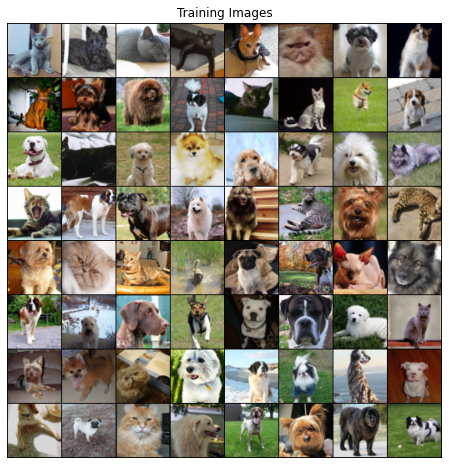

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt # 可視化のためのグラフ描画ライブラリです。

BATCH_SIZE = 128 # 一度に取り出すデータの個数。大きいほど学習が速く進むが、計算量やメモリ使用料が増える。

dataloader = torch.utils.data.DataLoader( # データの取り出し方を決めるものです。
    dataset,batch_size=BATCH_SIZE,
    shuffle=True # 全データをシャッフルしながら取り出します。（重複なし）
)

real_batch = next(iter(dataloader)) # 1バッチ分取り出して
real_batch = real_batch[0] # (data, )というタプル構造になっているのでこの処理が入ります。
images = torchvision.utils.make_grid(real_batch[:64],padding=True, normalize=True) # 64枚をひとまとめにした画像を作って
images = np.transpose(images.numpy(),(1,2,0)) # 描画用のデータ形式にして
plt.figure(figsize=(8,8)) # 8x8inchの空の図を作成し
plt.axis("off") # 軸の描画を切ります。
plt.title("Training Images") # タイトルをつけて
plt.imshow(images) # 画像を埋め込み、
plt.show() # 描画！


# ・AIモデルの定義

### Generator (生成器)

### Discriminator (判別器)

# ・学習

### どうやって画像生成器を作るのか？

### 評価方法

##### 実は大変なGANの学習 -モード崩壊について-
もしGeneratorの学習が変な方向に進んだ結果、とてつもなく高品質な画像1枚だけを生成するようになってしまったとしても、Generatorの学習目的としては成功したことになります。こういった生成データのバリエーションが極端に乏しく学習が進んでしまうことを**モード崩壊**といいます。

### 記録について

# ・実行してみよう！

# ・結果を見てみよう！

# 参照

In [1]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# 再現性のためにランダムシードを設定する
manualSeed = 999
#manualSeed = random.randint（1、10000）＃新しい結果が必要な場合に使用
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [18]:
dataroot = "data/images"

# データローダーのワーカー数
workers = 0

# トレーニングのバッチサイズ
batch_size = 128

# トレーニング画像の空間サイズ。
# すべての画像はトランスフォーマーを使用してこのサイズに変更されます。
image_size = 64

# トレーニング画像のチャネル数。カラー画像の場合は「3」 
nc = 3

# 潜在ベクトル z のサイズ（つまり、ジェネレータ入力のサイズ）
nz = 100

# 生成器の feature map のサイズ
ngf = 64

# 識別器の feature map のサイズ
ndf = 64

# エポック数
num_epochs = 50

# 学習率
lr = 0.0002

# Adam オプティマイザのBeta1ハイパーパラメータ
beta1 = 0.5

# 使用可能なGPUの数。0の場合、CPUモードで実行されます
ngpu = 1

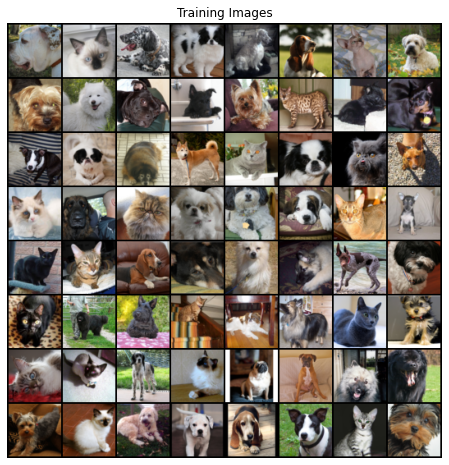

In [19]:
# 画像フォルダデータセットは、以下で設定した方法で使用できます。

# データセットを作成する
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# データローダーを作成する
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# 実行するデバイスを決定する
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# トレーニング画像をプロットする
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [20]:
# G（生成器）とD（識別器）の重みの初期化
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [21]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # 入力は Z で、畳み込み層に渡されます
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # サイズ (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # サイズ  (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # サイズ (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # サイズ (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # サイズ (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [23]:
# ジェネレーターを作成します
netG = Generator(ngpu).to(device)

# 必要に応じてGPUを使用します
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# weights_init関数を適用して、すべての重みを平均「0」、標準偏差「0.02」でランダムに初期化します。
netG.apply(weights_init)

# モデルを出力します
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [24]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # 入力は (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # サイズ (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # サイズ (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # サイズ (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # サイズ (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [25]:
# Create the Discriminator
# 識別器を作成します
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
# 必要に応じてGPUを使用します
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
# weights_init関数を適用して、すべての重みを平均「0」、標準偏差「0.02」でランダムに初期化します。
netD.apply(weights_init)

# Print the model
# モデルを出力します
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [26]:
# BCELoss関数を初期化します
criterion = nn.BCELoss()

# ジェネレータの進行を視覚化するために使用する潜在ベクトルを作成します
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# トレーニング中に本物のラベルと偽のラベルのルールを設定します
real_label = 1.
fake_label = 0.

# G と D に Adam オプティマイザを設定する
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [27]:
# トレーニングループ

# 進捗状況を追跡するためのリスト
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# エポックごとのループ
for epoch in range(num_epochs):
    # データローダーのバッチごとのループ
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Dネットワークの更新：log(D(x)) + log(1 - D(G(z))) を最大化します
        ###########################
        ## 実在の画像でトレーニングします
        netD.zero_grad()
        # バッチのフォーマット
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # 実在の写真で D の順伝播させます
        output = netD(real_cpu).view(-1)
        # 損失を計算します
        errD_real = criterion(output, label)
        # 逆伝播でDの勾配を計算します
        errD_real.backward()
        D_x = output.mean().item()

        ## 偽の画像でトレーニングします
        # 潜在ベクトルのバッチを生成します
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Gで偽の画像を生成します
        fake = netG(noise)
        label.fill_(fake_label)
        # 生成した偽画像をDで分類します
        output = netD(fake.detach()).view(-1)
        # Dの損失を計算します
        errD_fake = criterion(output, label)
        # 勾配を計算します
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # 実在の画像の勾配と偽画像の勾配を加算します
        errD = errD_real + errD_fake
        # Dを更新します
        optimizerD.step()

        ############################
        # (2) Gネットワ​​ークの更新：log(D(G(z))) を最大化します
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # 偽のラベルは生成器の損失にとって本物です
        # パラメータ更新後のDを利用して、偽画像を順伝播させます
        output = netD(fake).view(-1)
        # この出力に基づいてGの損失を計算します
        errG = criterion(output, label)
        # Gの勾配を計算します
        errG.backward()
        D_G_z2 = output.mean().item()
        # Gを更新します
        optimizerG.step()

        # トレーニング統計を出力します
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # 後でプロットするために損失を保存します
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # fixed_noiseによる G の出力を保存し、生成器の精度を確認します
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/50][0/58]	Loss_D: 1.8706	Loss_G: 5.7898	D(x): 0.4893	D(G(z)): 0.5663 / 0.0044
[0/50][50/58]	Loss_D: 0.0780	Loss_G: 8.2485	D(x): 0.9387	D(G(z)): 0.0008 / 0.0004
[1/50][0/58]	Loss_D: 0.1473	Loss_G: 11.3448	D(x): 0.8929	D(G(z)): 0.0001 / 0.0000
[1/50][50/58]	Loss_D: 0.4910	Loss_G: 2.9902	D(x): 0.8118	D(G(z)): 0.1767 / 0.0704
[2/50][0/58]	Loss_D: 0.4606	Loss_G: 3.8804	D(x): 0.7432	D(G(z)): 0.0355 / 0.0279
[2/50][50/58]	Loss_D: 0.5250	Loss_G: 2.6190	D(x): 0.7124	D(G(z)): 0.1278 / 0.0901
[3/50][0/58]	Loss_D: 0.7427	Loss_G: 4.7339	D(x): 0.8065	D(G(z)): 0.3392 / 0.0177
[3/50][50/58]	Loss_D: 0.4609	Loss_G: 3.8434	D(x): 0.8177	D(G(z)): 0.1923 / 0.0293
[4/50][0/58]	Loss_D: 0.2537	Loss_G: 4.3145	D(x): 0.8479	D(G(z)): 0.0727 / 0.0165
[4/50][50/58]	Loss_D: 0.6212	Loss_G: 4.4888	D(x): 0.6807	D(G(z)): 0.0392 / 0.0168
[5/50][0/58]	Loss_D: 0.2345	Loss_G: 5.1444	D(x): 0.9027	D(G(z)): 0.0753 / 0.0083
[5/50][50/58]	Loss_D: 1.2893	Loss_G: 8.6443	D(x): 0.4563	D(G(z)): 0.0005 / 0.

In [28]:
torch.save(netD.state_dict(),"Discriminator.pth")
torch.save(netG.state_dict(),"Generator.pth")

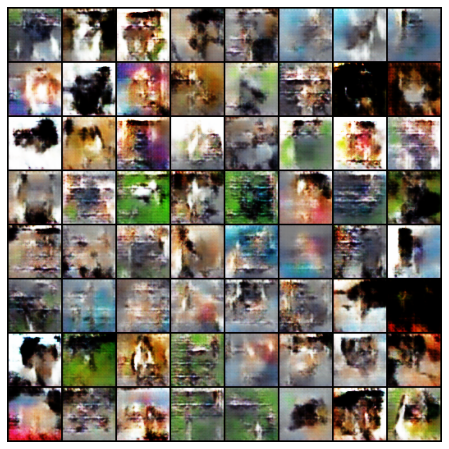

In [29]:
#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())